In [11]:
from qiskit import *
import matplotlib.pyplot as plt

simulator = Aer.get_backend('qasm_simulator')

# Simulation d'un modèle de Ising sur un ordinateur quantque

In [12]:
a = 1
J = 1
dt = 0.1

N = 3

L'opérateur d'évolution du hamiltonien 

$$ H = \sum_{(i,j)} J Z_i Z_j - a \sum_i X_i$$

peut être implément via le circuit ci-dessous qui donne donc $U = e^{iHt}$ (cf. https://share.phys.ethz.ch/~alps/cqp.pdf)

In [13]:
# one dt circuit operation
ope = QuantumCircuit(N)

for i in range(N):
    ope.rx(-2*a*dt, i)

for i in range(N):
    for j in range(i+1, N):
        ope.cx(i, j)
        ope.rz(2*J*dt, j)
        ope.cx(i, j)

ope_gate = ope.to_gate()

print(ope.draw(output='latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{R_X}\,(\mathrm{-0.2})} & \ctrl{1} & \qw & \ctrl{1} & \ctrl{2} & \qw & \ctrl{2} & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{R_X}\,(\mathrm{-0.2})} & \targ & \gate{\mathrm{R_Z}\,(\mathrm{0.2})} & \targ & \qw & \qw & \qw & \ctrl{1} & \qw & \ctrl{1} & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{R_X}\,(\mathrm{-0.2})} & \qw & \qw & \qw & \targ & \gate{\mathrm{R_Z}\,(\mathrm{0.2})} & \targ & \targ & \gate{\mathrm{R_Z}\,(\mathrm{0.2})} & \targ & \qw & \qw\\
\\ }}
\end{document}


c:\Python310\lib\site-packages\qiskit\visualization\circuit\latex.py:154: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, _ = load_style(style)


## Évolution sur 1 $\Delta t$ de l'état $|000\rangle$

c:\Python310\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


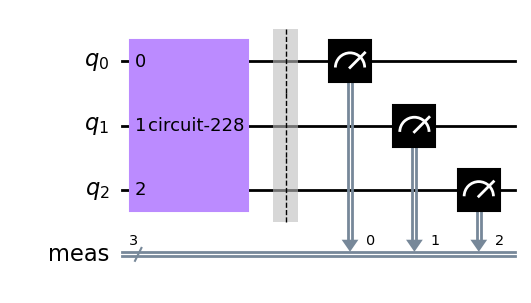

In [14]:
test = QuantumCircuit(N)

test.append(ope_gate, range(N))

test.measure_all()

test.draw(output='mpl')

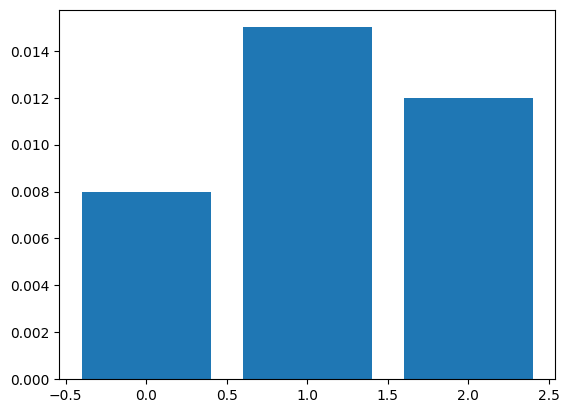

In [15]:
shots = 1000
job = execute(test, simulator, shots=shots)
result = job.result()
counts = result.get_counts(test)

ones = [0 for i in range(N)]
for k in counts.keys():
    for i in range(len(k)):
        if k[i] == '1':
            ones[i] += counts[k]

ones = [ones[i]/shots for i in range(N)]

# display a plot of bar of height ones[i] for each i
plt.bar(range(N), ones)
plt.show()

## De même après 10 $\Delta t$

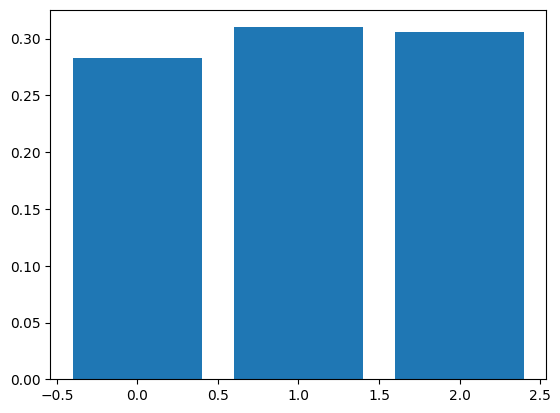

In [16]:
time_it = 10

test = QuantumCircuit(N)

for i in range(time_it):
    test.append(ope_gate, range(N))

test.measure_all()

shots = 1000
job = execute(test, simulator, shots=shots)
result = job.result()
counts = result.get_counts(test)

ones = [0 for i in range(N)]
for k in counts.keys():
    for i in range(len(k)):
        if k[i] == '1':
            ones[i] += counts[k]

ones = [ones[i]/shots for i in range(N)]

# display a plot of bar of height ones[i] for each i
plt.bar(range(N), ones)
plt.show()

## Évolution de $|101\rangle$ sur 30 $\Delta t$

In [31]:
def ising(iter):
    test = QuantumCircuit(N)

    test.x(0)
    test.x(2)

    for i in range(iter):
        test.append(ope_gate, range(N))

    test.measure_all()

    shots = 1000
    job = execute(test, simulator, shots=shots)
    result = job.result()
    counts = result.get_counts(test)

    ones = [0 for i in range(N)]
    for k in counts.keys():
        for i in range(len(k)):
            if k[i] == '1':
                ones[i] += counts[k]

    ones = [2*ones[i]/shots-1 for i in range(N)]
    return ones

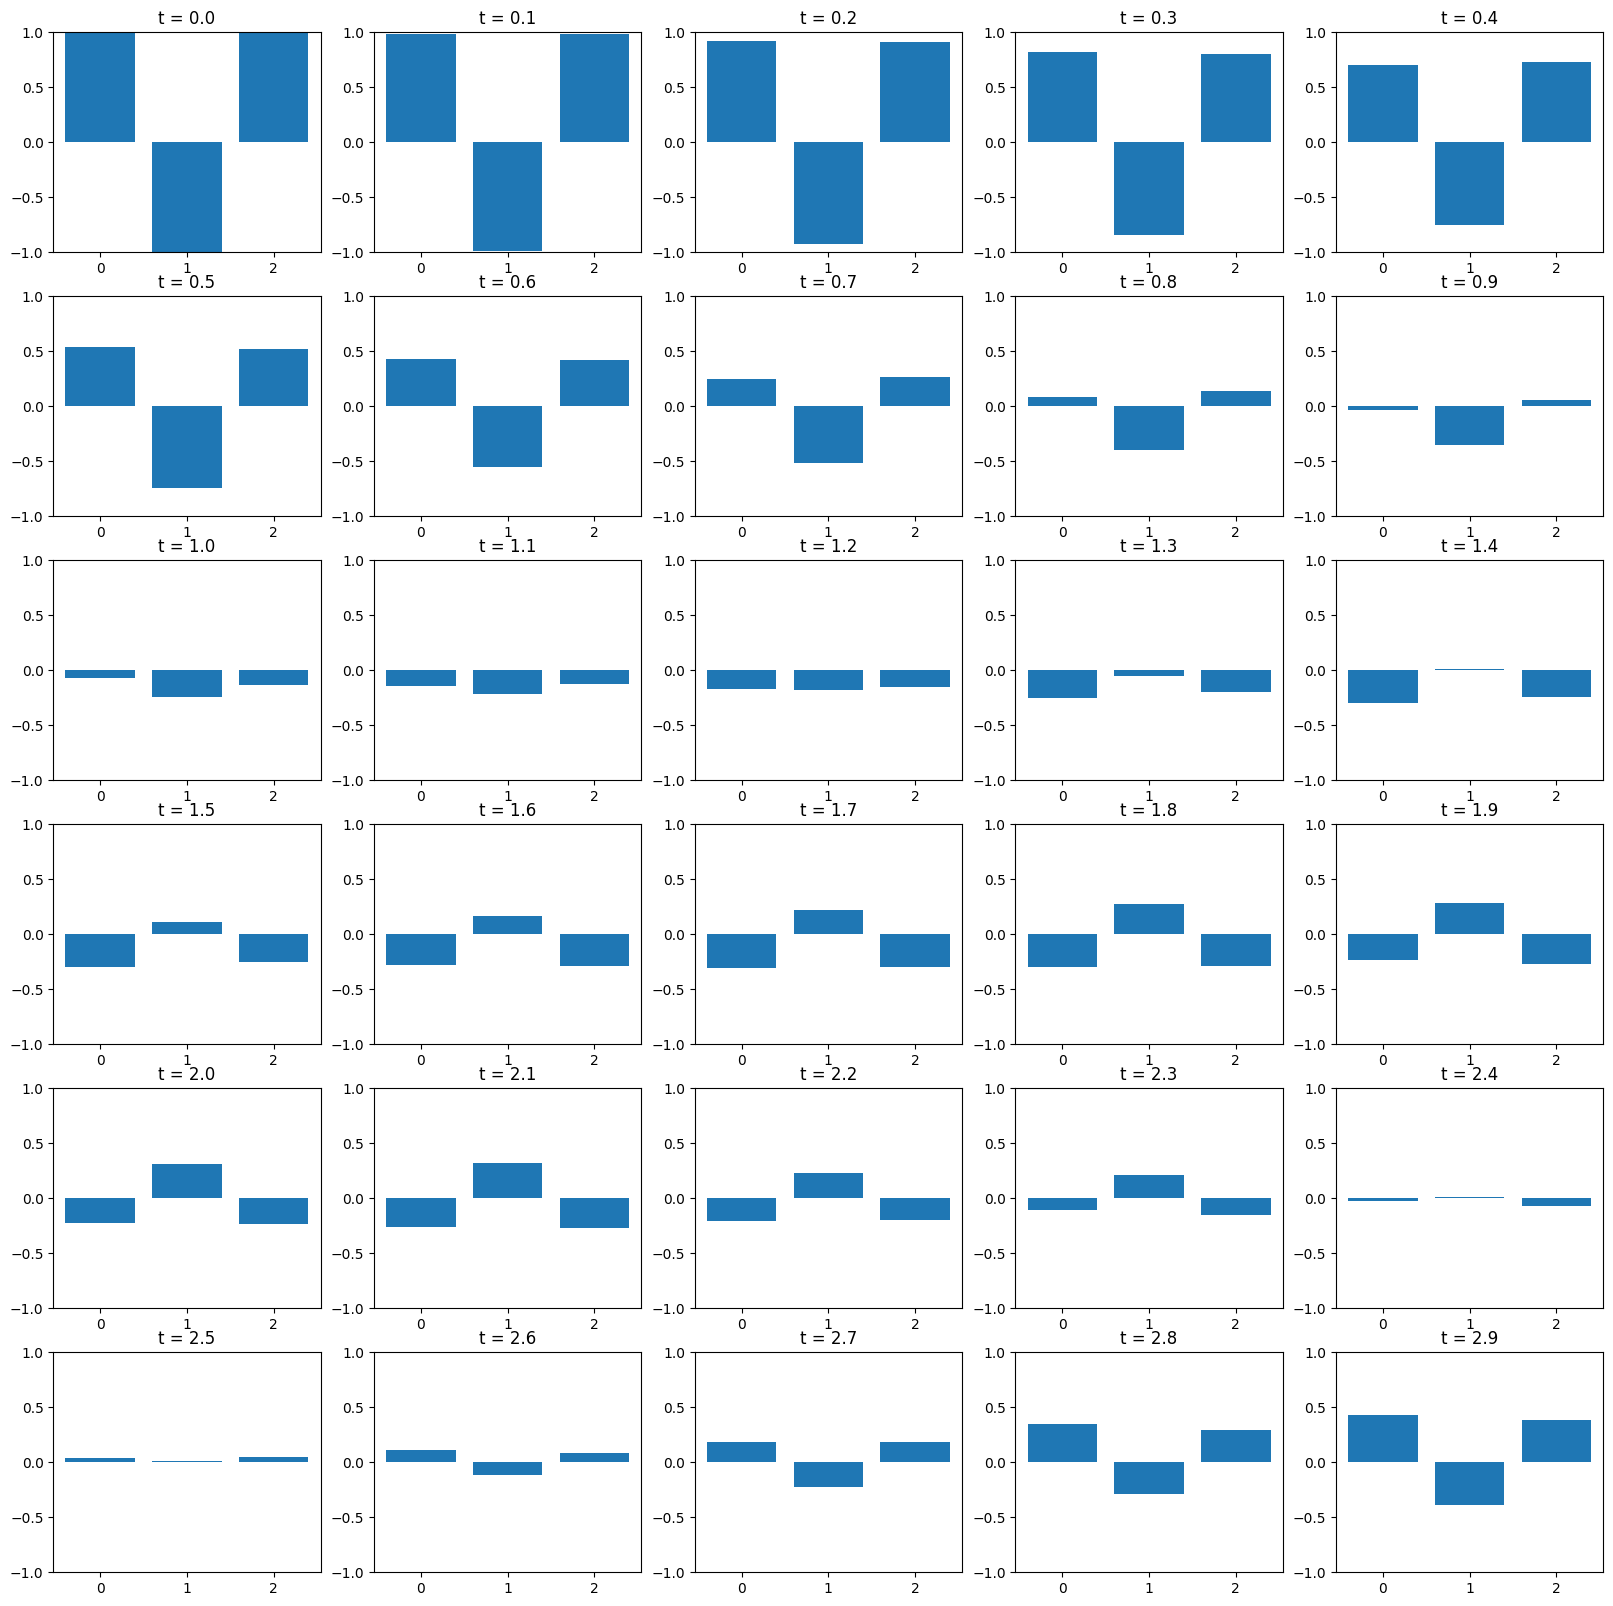

In [32]:
steps = 30
evolve = [ising(i) for i in range(steps)]

plt.figure(figsize=(20, 20))
for i in range(steps):
    plt.subplot(int(steps/5), 5, i+1)
    plt.bar(range(N), evolve[i])
    plt.ylim(-1, 1)
    plt.title('t = ' + str(round(i*dt,1)))
plt.show()

In [19]:
# using tikzplotlib to export plot to latex
import tikzplotlib

def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

def save_fig(name, width='10cm', height='10cm'):
    fig = plt.gcf()
    tikzplotlib_fix_ncols(fig)

    tikzplotlib.clean_figure()
    tikzplotlib.save(name + '.tex', axis_width=width, axis_height=height)

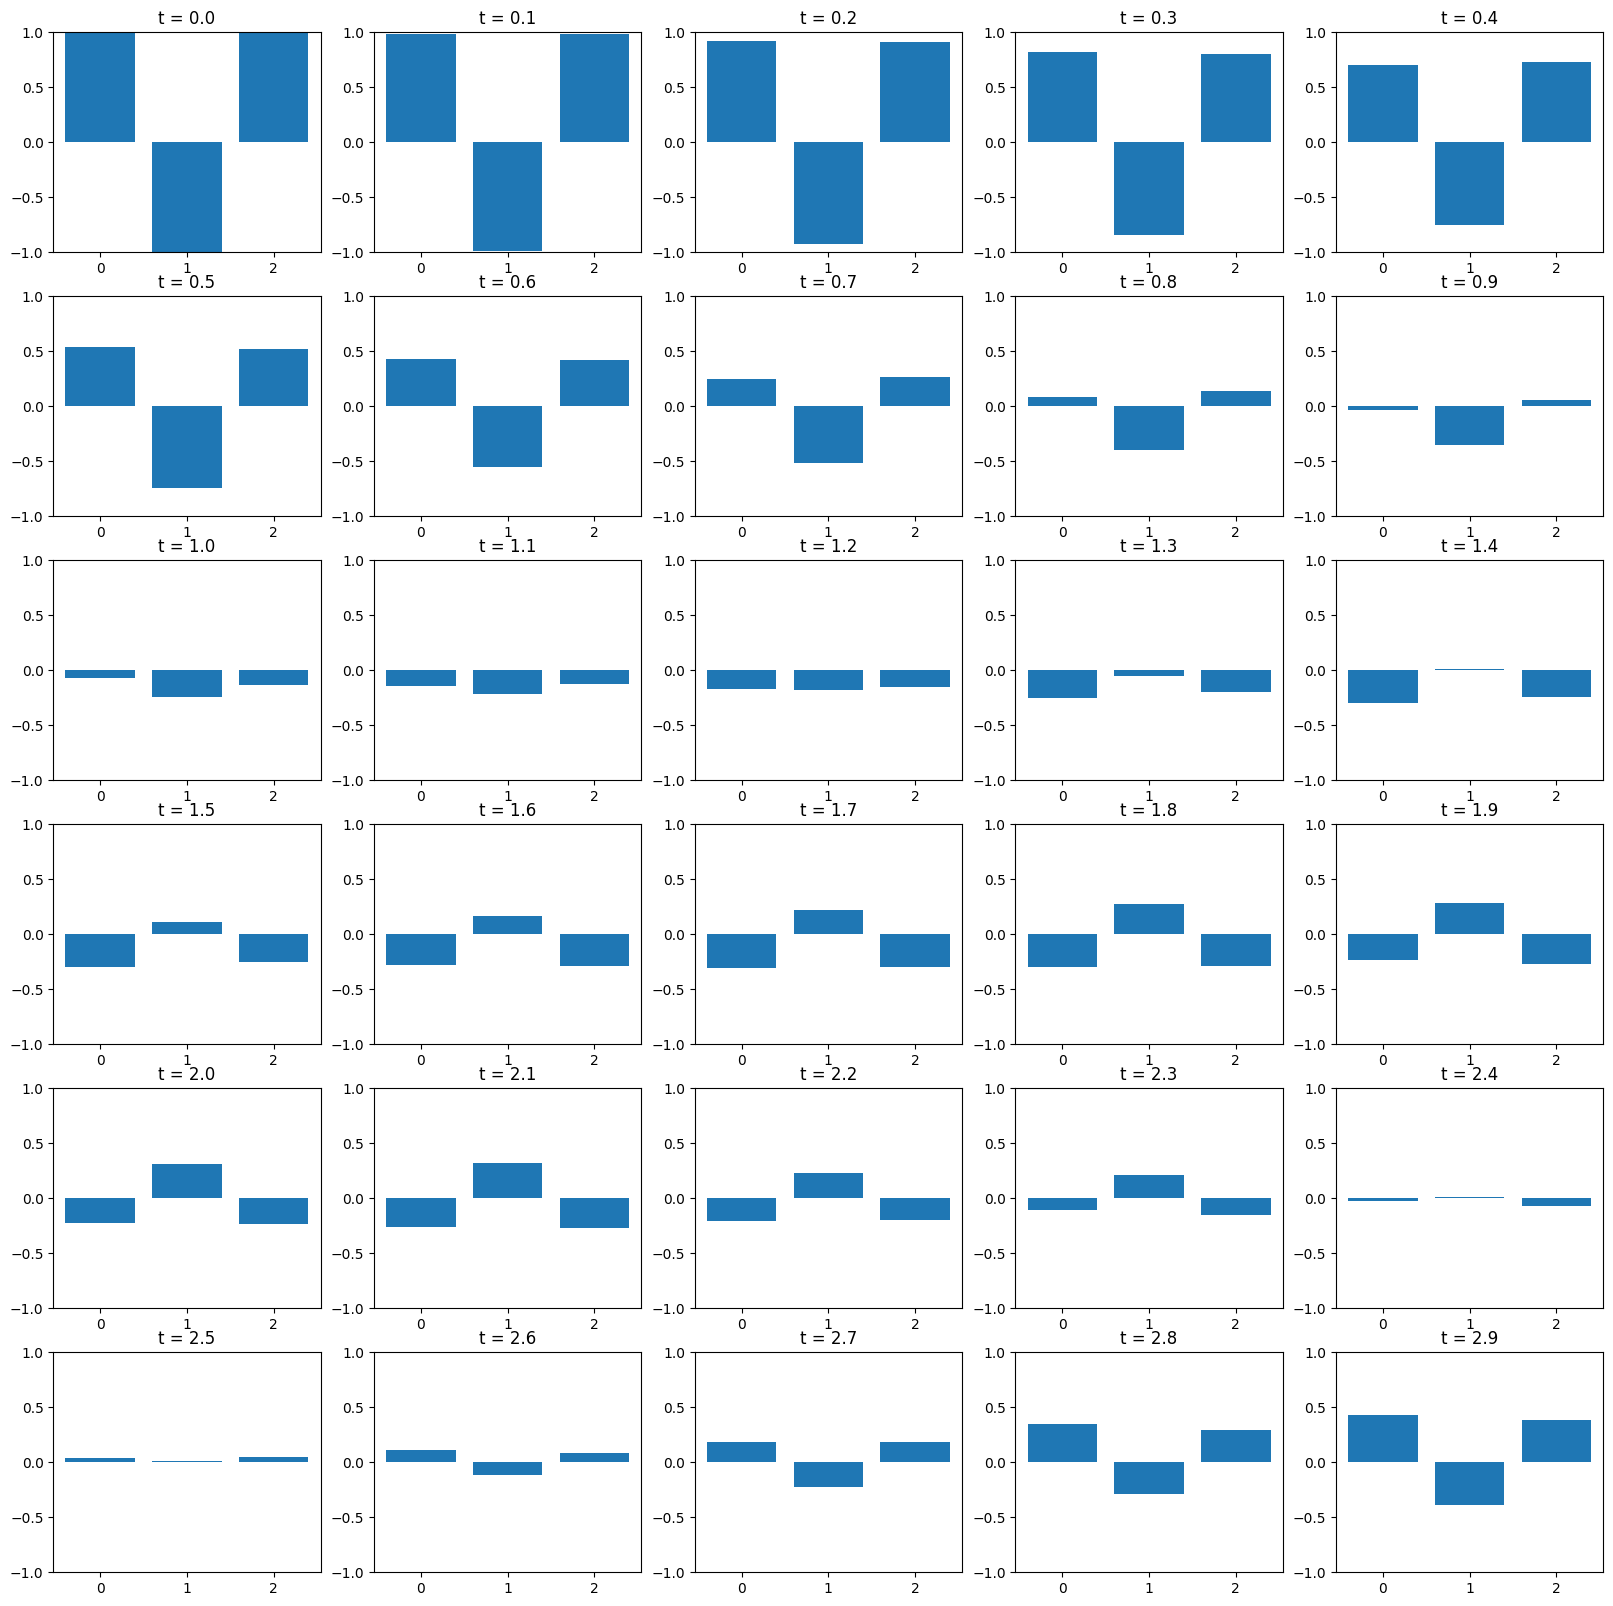

In [34]:
plt.figure(figsize=(20, 20))
for i in range(steps):
    plt.subplot(int(steps/5), 5, i+1)
    plt.bar(range(N), evolve[i])
    plt.ylim(-1, 1)
    plt.title('t = ' + str(round(i*dt,1)))

save_fig('ising')